In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tips.xls')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
df.total_bill.max()

50.81

<AxesSubplot:ylabel='Frequency'>

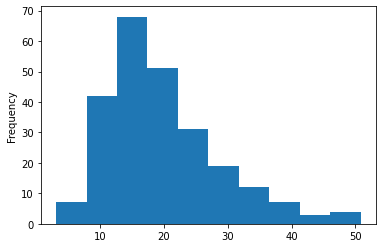

In [4]:
df['total_bill'].plot(kind='hist')

<AxesSubplot:title={'center':'Weekdays'}>

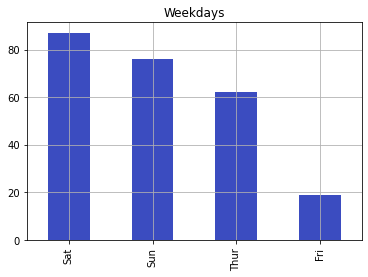

In [5]:
df['day'].value_counts().plot(kind='bar', grid=True, title='Weekdays', colormap='coolwarm')

<AxesSubplot:xlabel='day'>

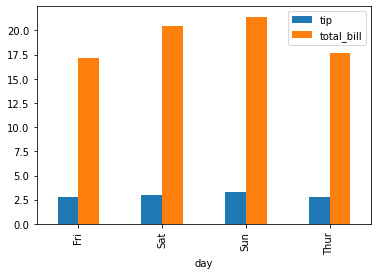

In [6]:
df.pivot_table(values=['total_bill', 'tip'], 
               index='day', 
               aggfunc='mean').plot(kind='bar')

In [7]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count')

tip
sex    smoker     
Female No       54
       Yes      33
Male   No       97
       Yes      60

<AxesSubplot:ylabel='smoker'>

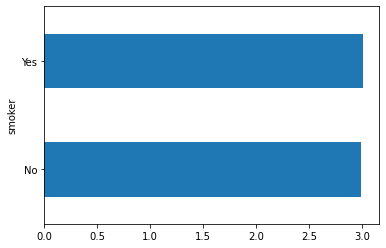

In [8]:
df.groupby('smoker')['tip'].mean().plot(kind = 'barh')

In [9]:
bills_per_day = df.groupby(by='day')['total_bill'].agg(['min', 'max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


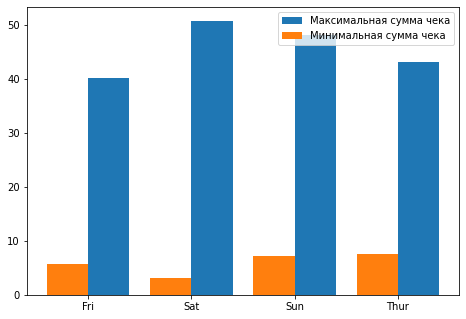

In [10]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

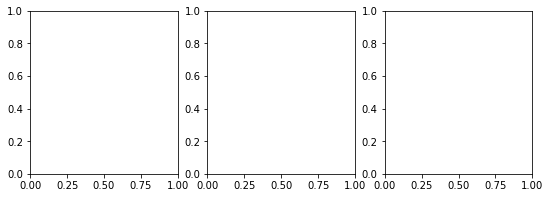

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# При использовании некоторых методов Seaborn 
# система может выдавать предупреждающие сообщения, 
# что метод применяется к определенному типу данных. 
# Эти предупреждения не являются сообщениями об ошибках, 
# их можно игнорировать и отключить выведение на экран:
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [13]:
df = pd.read_csv('tips.xls')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

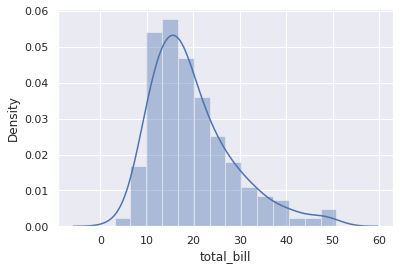

In [14]:
sns.set()
sns.distplot(df['total_bill'])

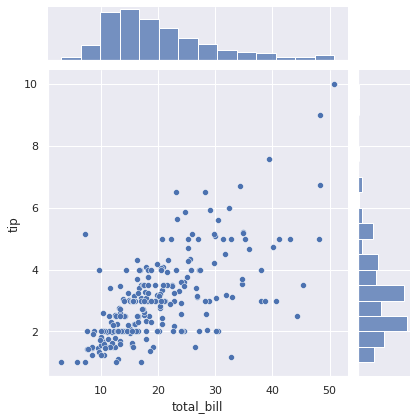

In [15]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

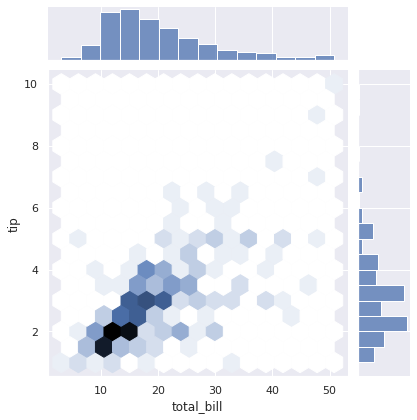

In [16]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'hex')

In [22]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

# Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:
init_notebook_mode(connected = True)
cf.go_offline()



df = pd.read_csv('tips.xls')

In [24]:
df.iplot()

In [25]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size = 'tip')